In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
path = "/Users/zamiulalam/Documents/Data Science/EmployeeAtrrition/WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = pd.read_csv(path)

In [84]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

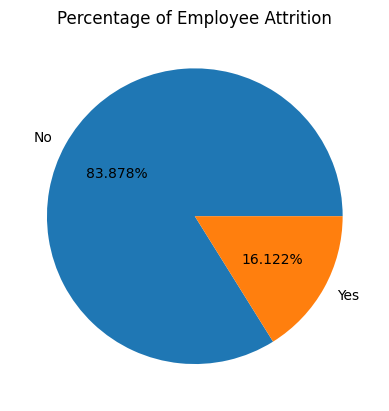

In [86]:
# get the set of distinct classes
labelz = ['No','Yes']

sizes = df.Attrition.value_counts().values

# plot the class value counts
fig, ax = plt.subplots()
ax.pie(np.array(sizes), labels=labelz, autopct='%1.3f%%')
ax.set_title('Percentage of Employee Attrition')
plt.show()

In [87]:
df_cat = df.select_dtypes(include = ["object"]).columns
df_num = df.select_dtypes(include = ["int64"]).columns

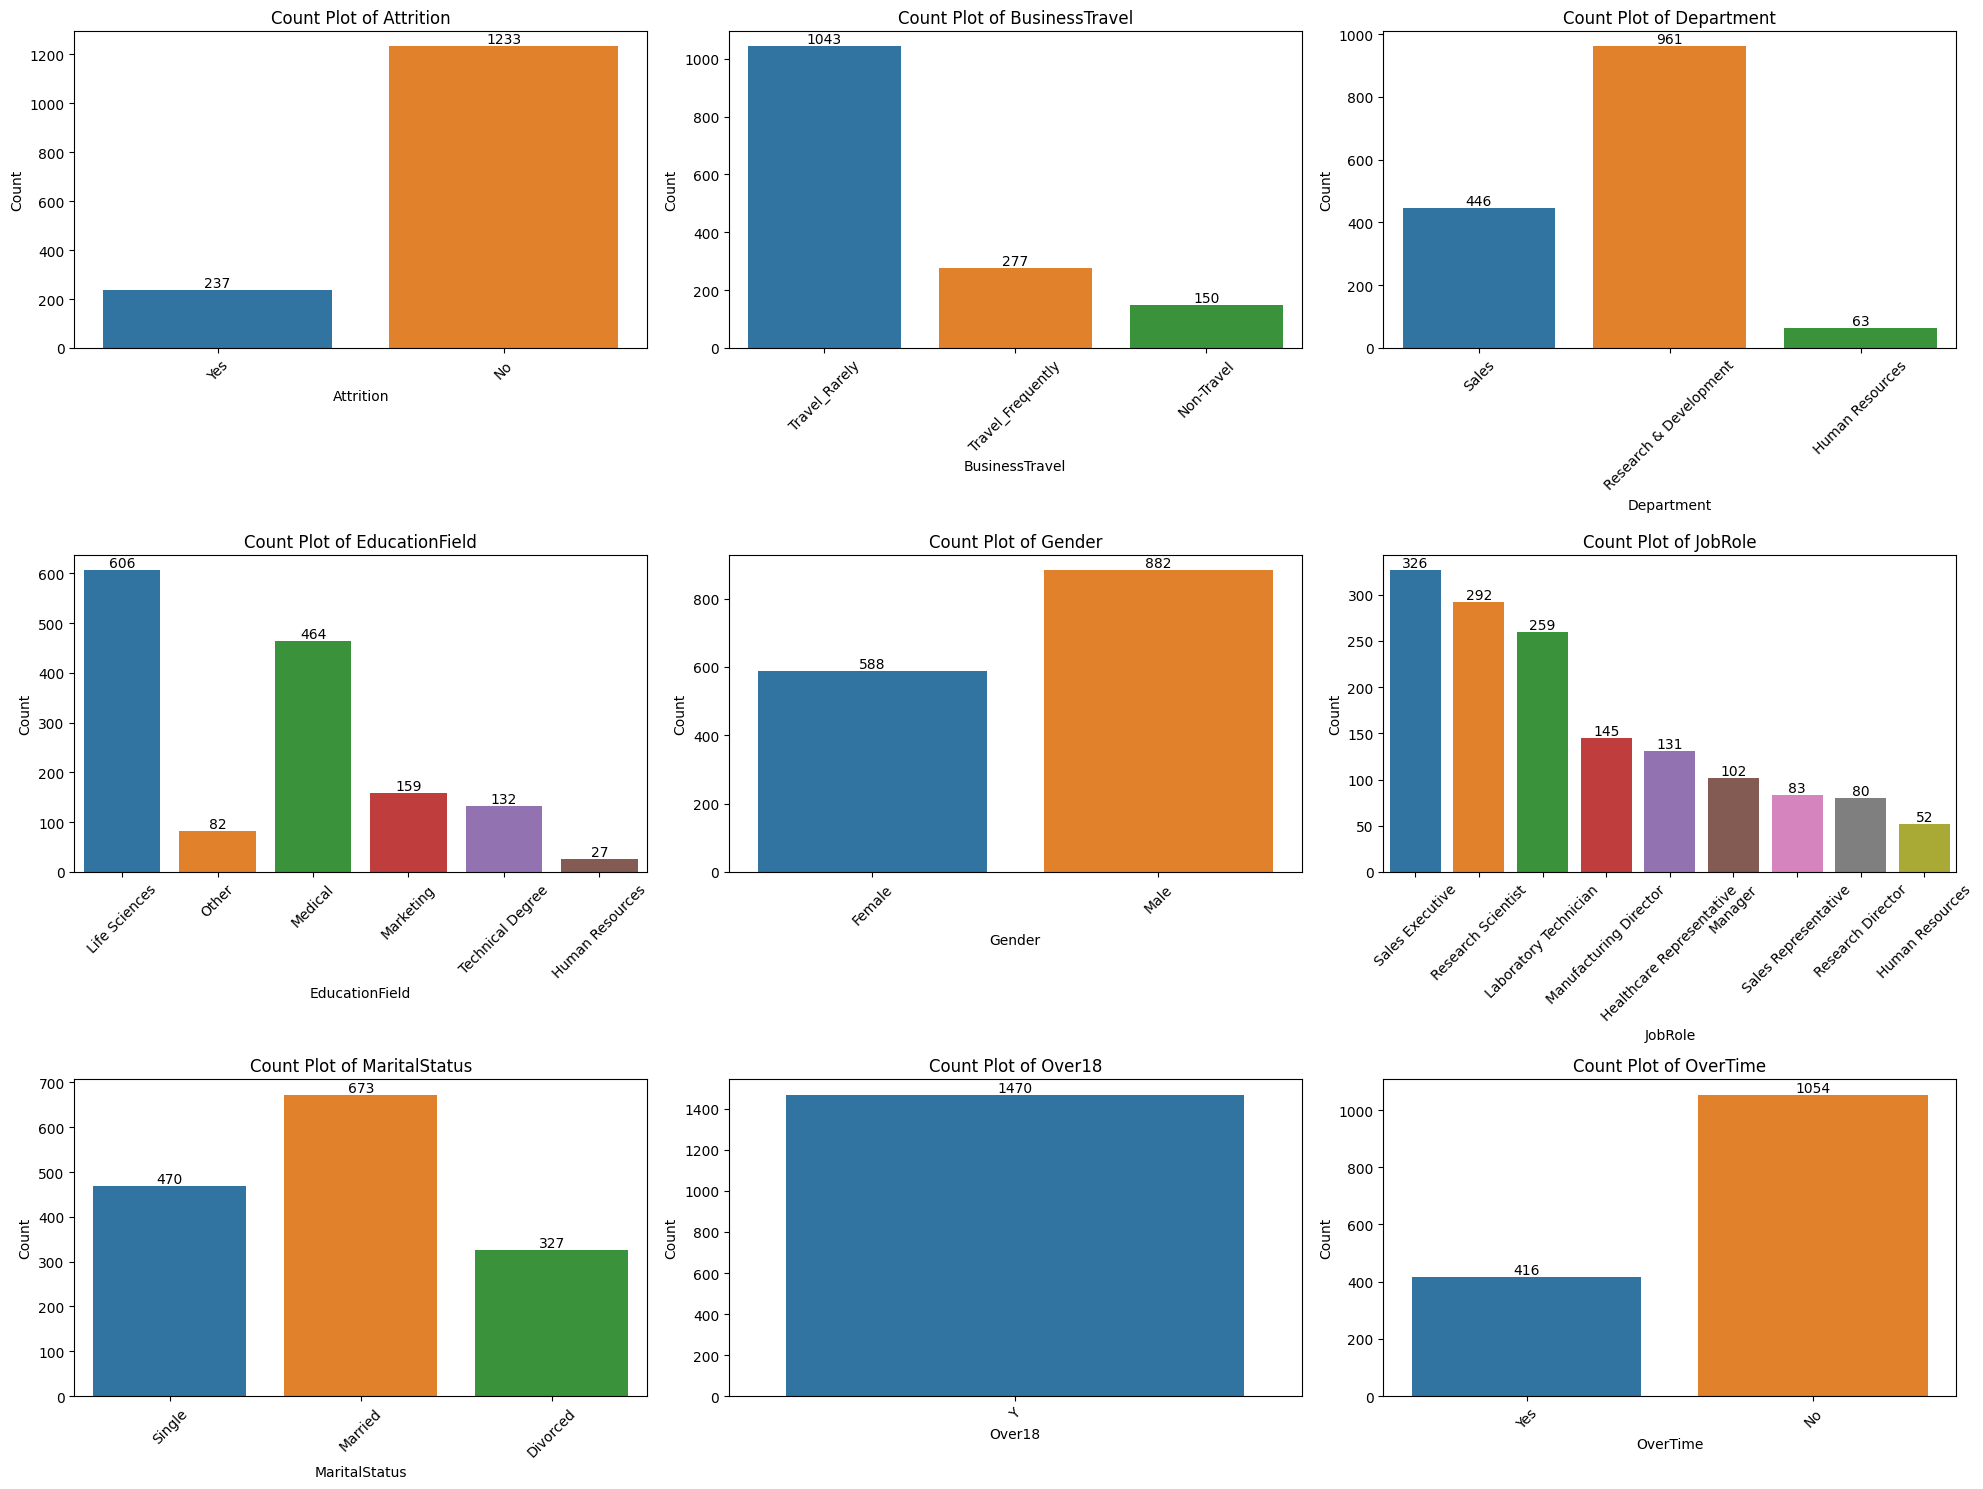

In [88]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.flatten()

for idx, cols in enumerate(df_cat):
    ax = axes[idx]
    sns.countplot(data=df, x=cols, hue=cols, ax=ax)
    for container in ax.containers:
        ax.bar_label(container)  # type: ignore
    ax.tick_params(axis='x', rotation=45)
    ax.set_title(f'Count Plot of {cols}')
    ax.set_xlabel(cols)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

We see that all emplyees are over 18. So we can drop that column.

In [89]:
df_cat = df_cat.drop(['Over18'])

In [90]:
df_num.size

26

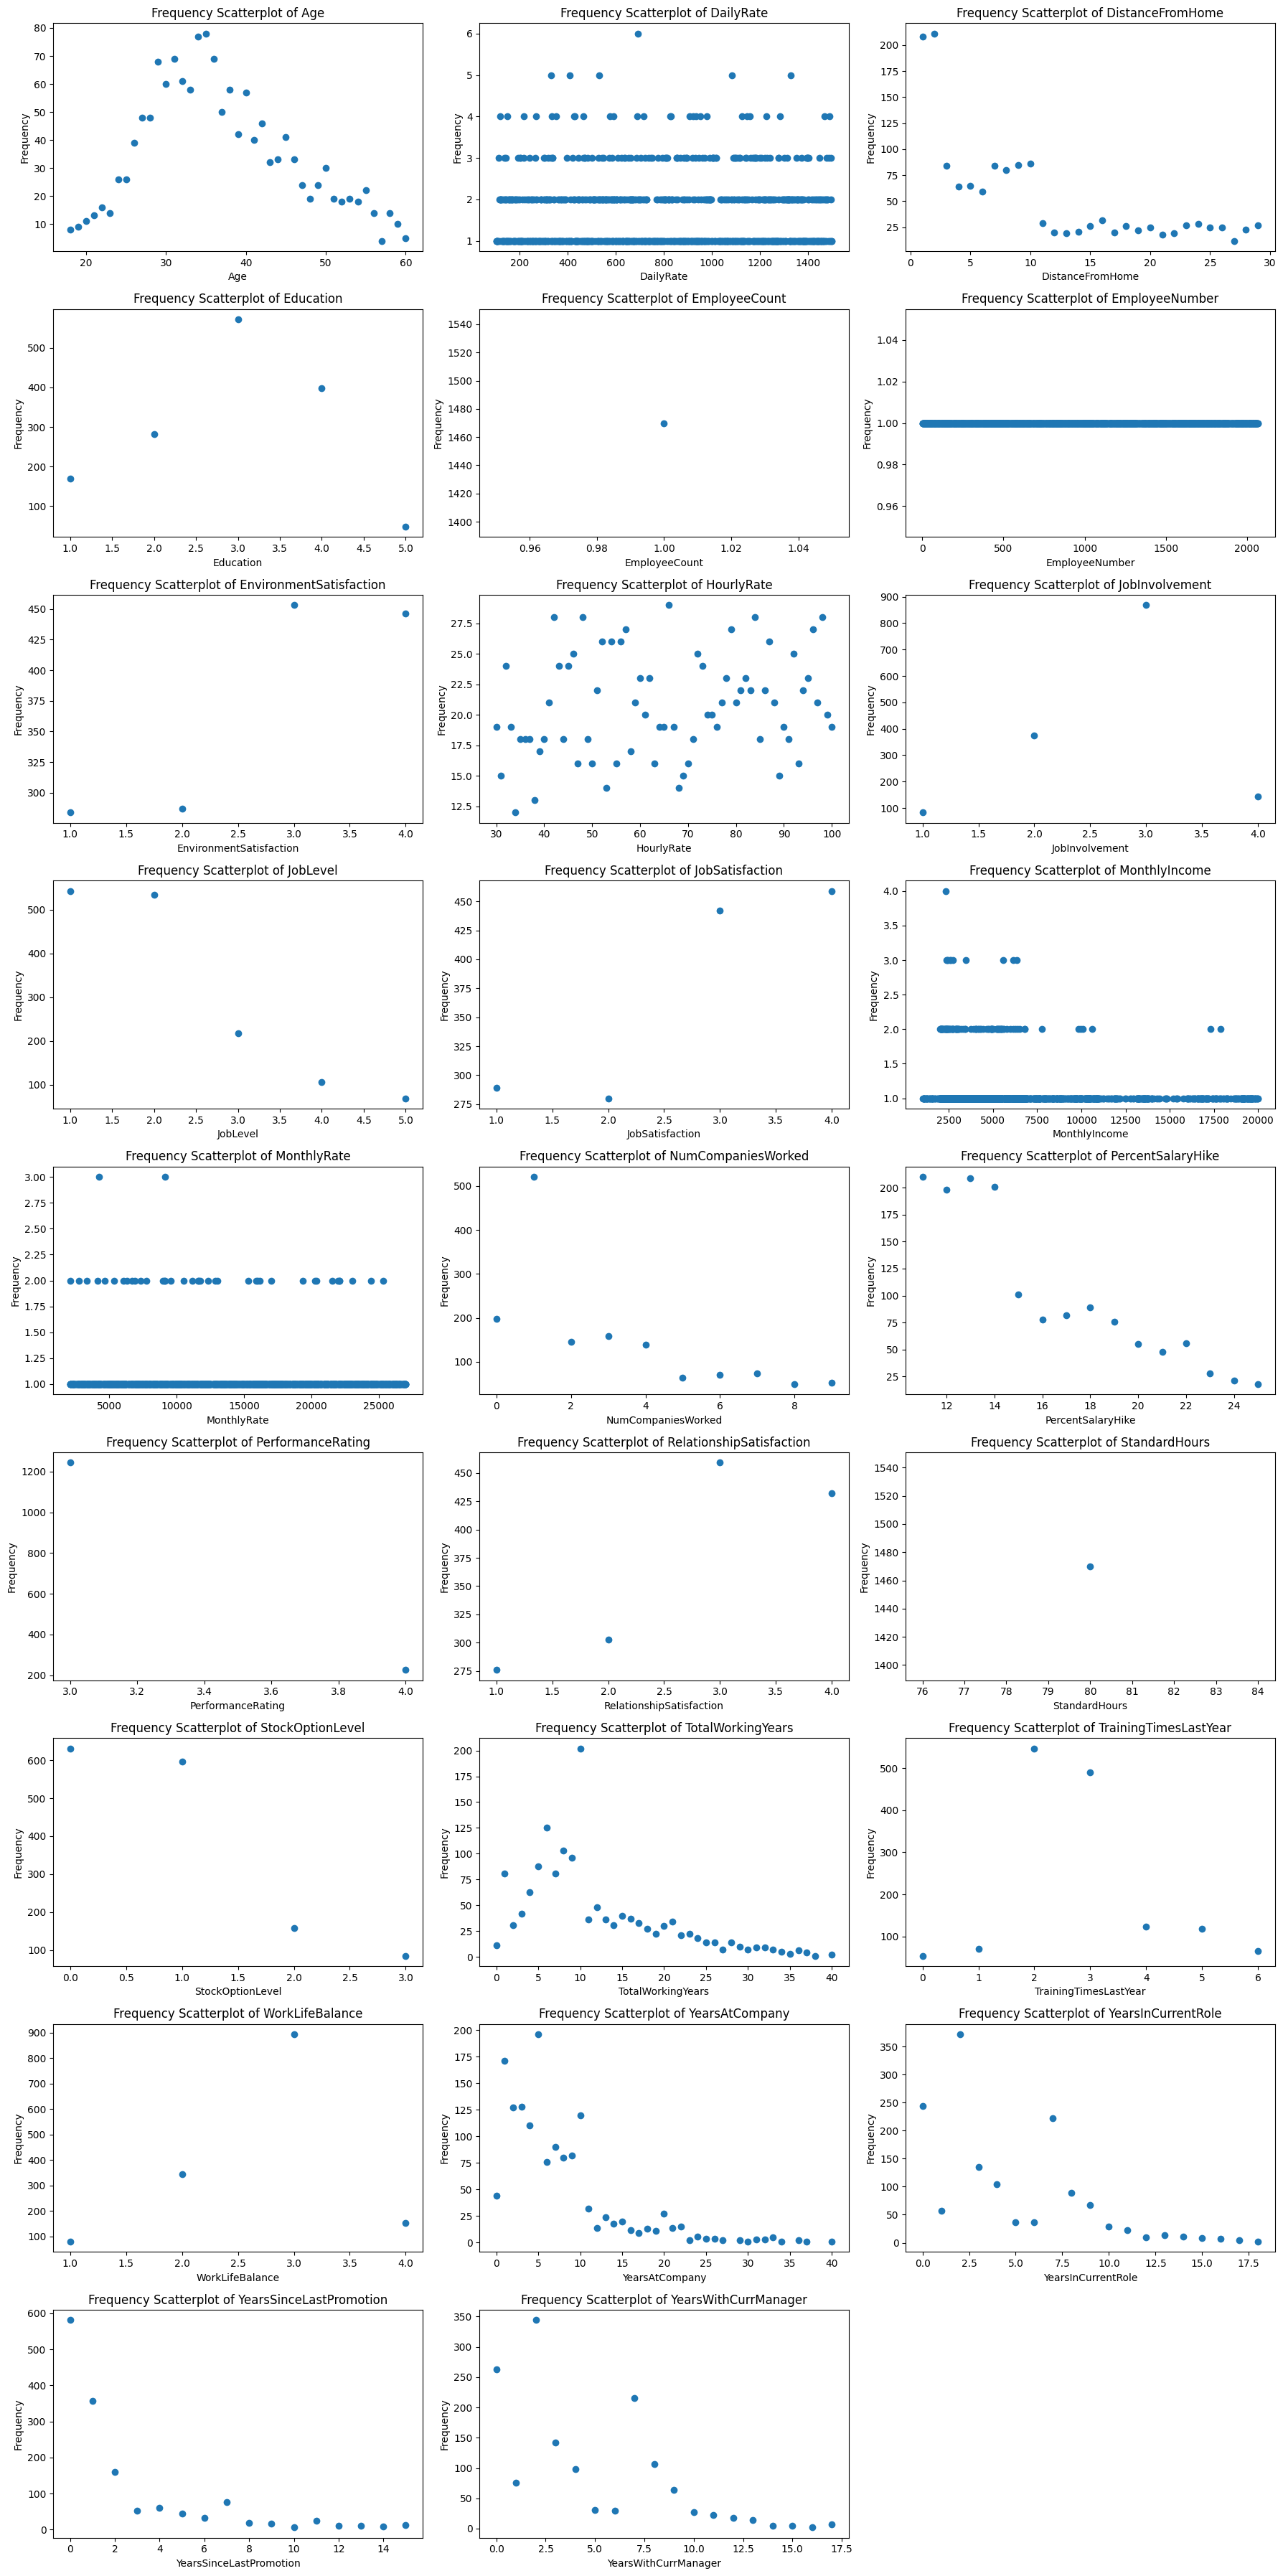

In [91]:
n_cols = 3
n_rows = (len(df_num) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for idx, col in enumerate(df_num):
    value_counts = df[col].value_counts().sort_index()
    axes[idx].scatter(value_counts.index, value_counts.values)
    axes[idx].set_title(f'Frequency Scatterplot of {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(len(df_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

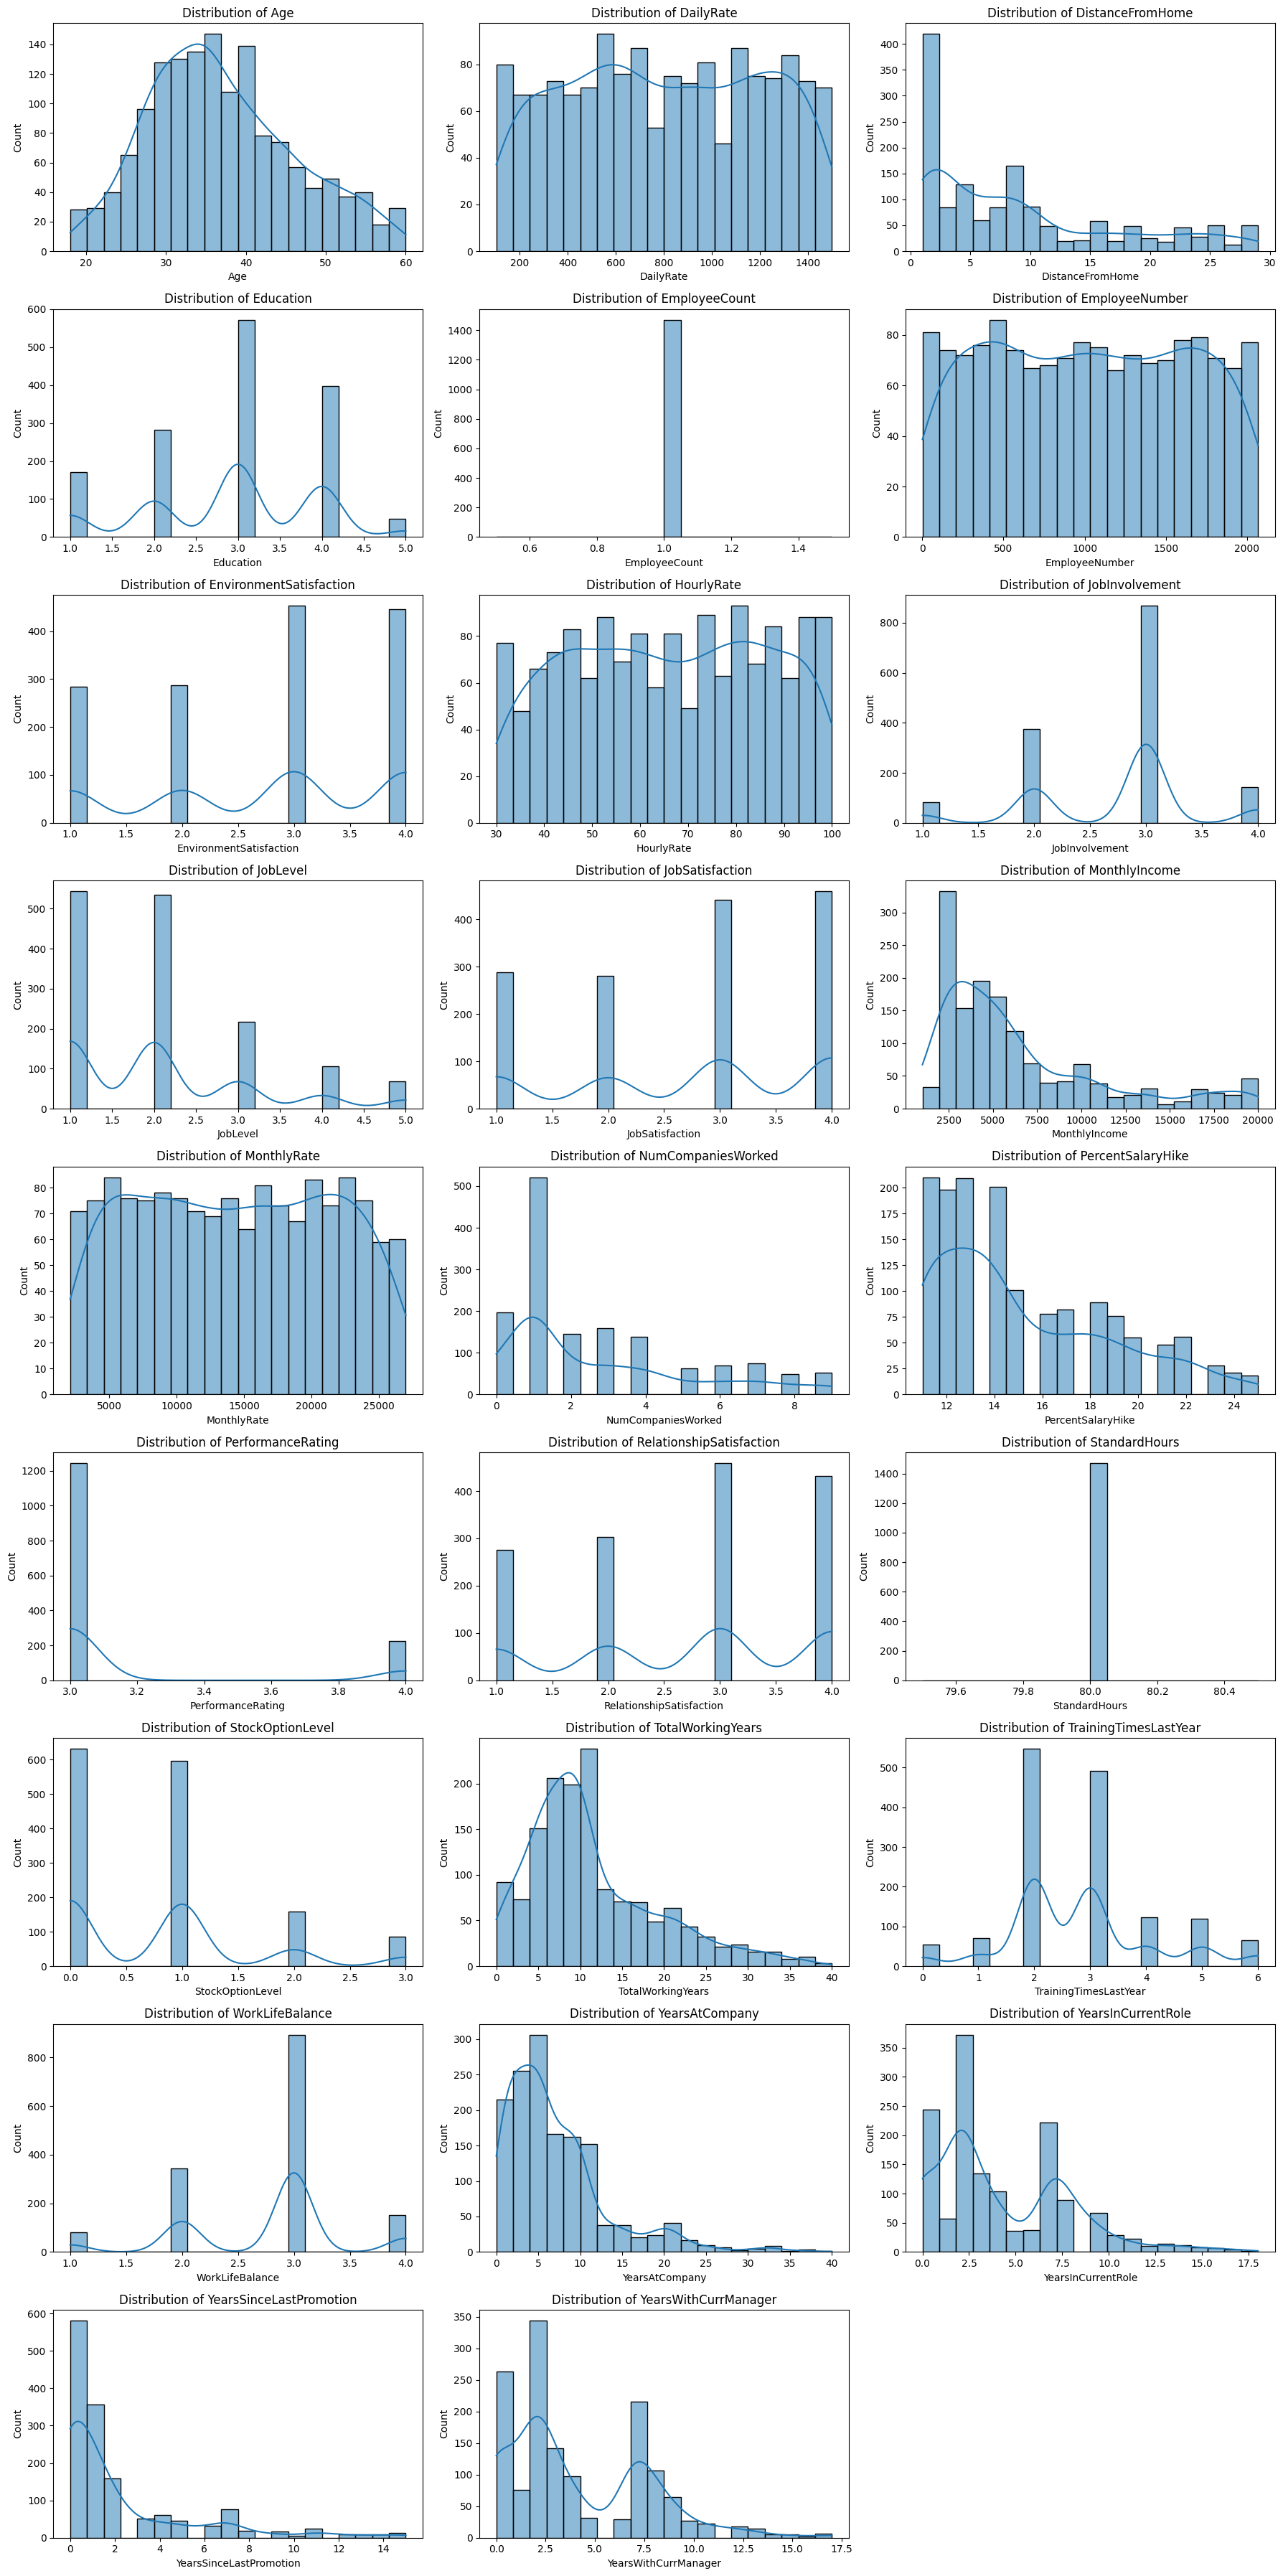

In [92]:
n_cols = 3
n_rows = (len(df_num) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df_num):
    ax = axes[i]
    sns.histplot(data=df, x=column, kde=True, bins=20, ax=ax)
    ax.set_title(f'Distribution of {column}')

# Hide any unused subplots
for j in range(len(df_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [93]:
df_num = df_num.drop(['EmployeeCount','StandardHours'])

In [94]:
df_num

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

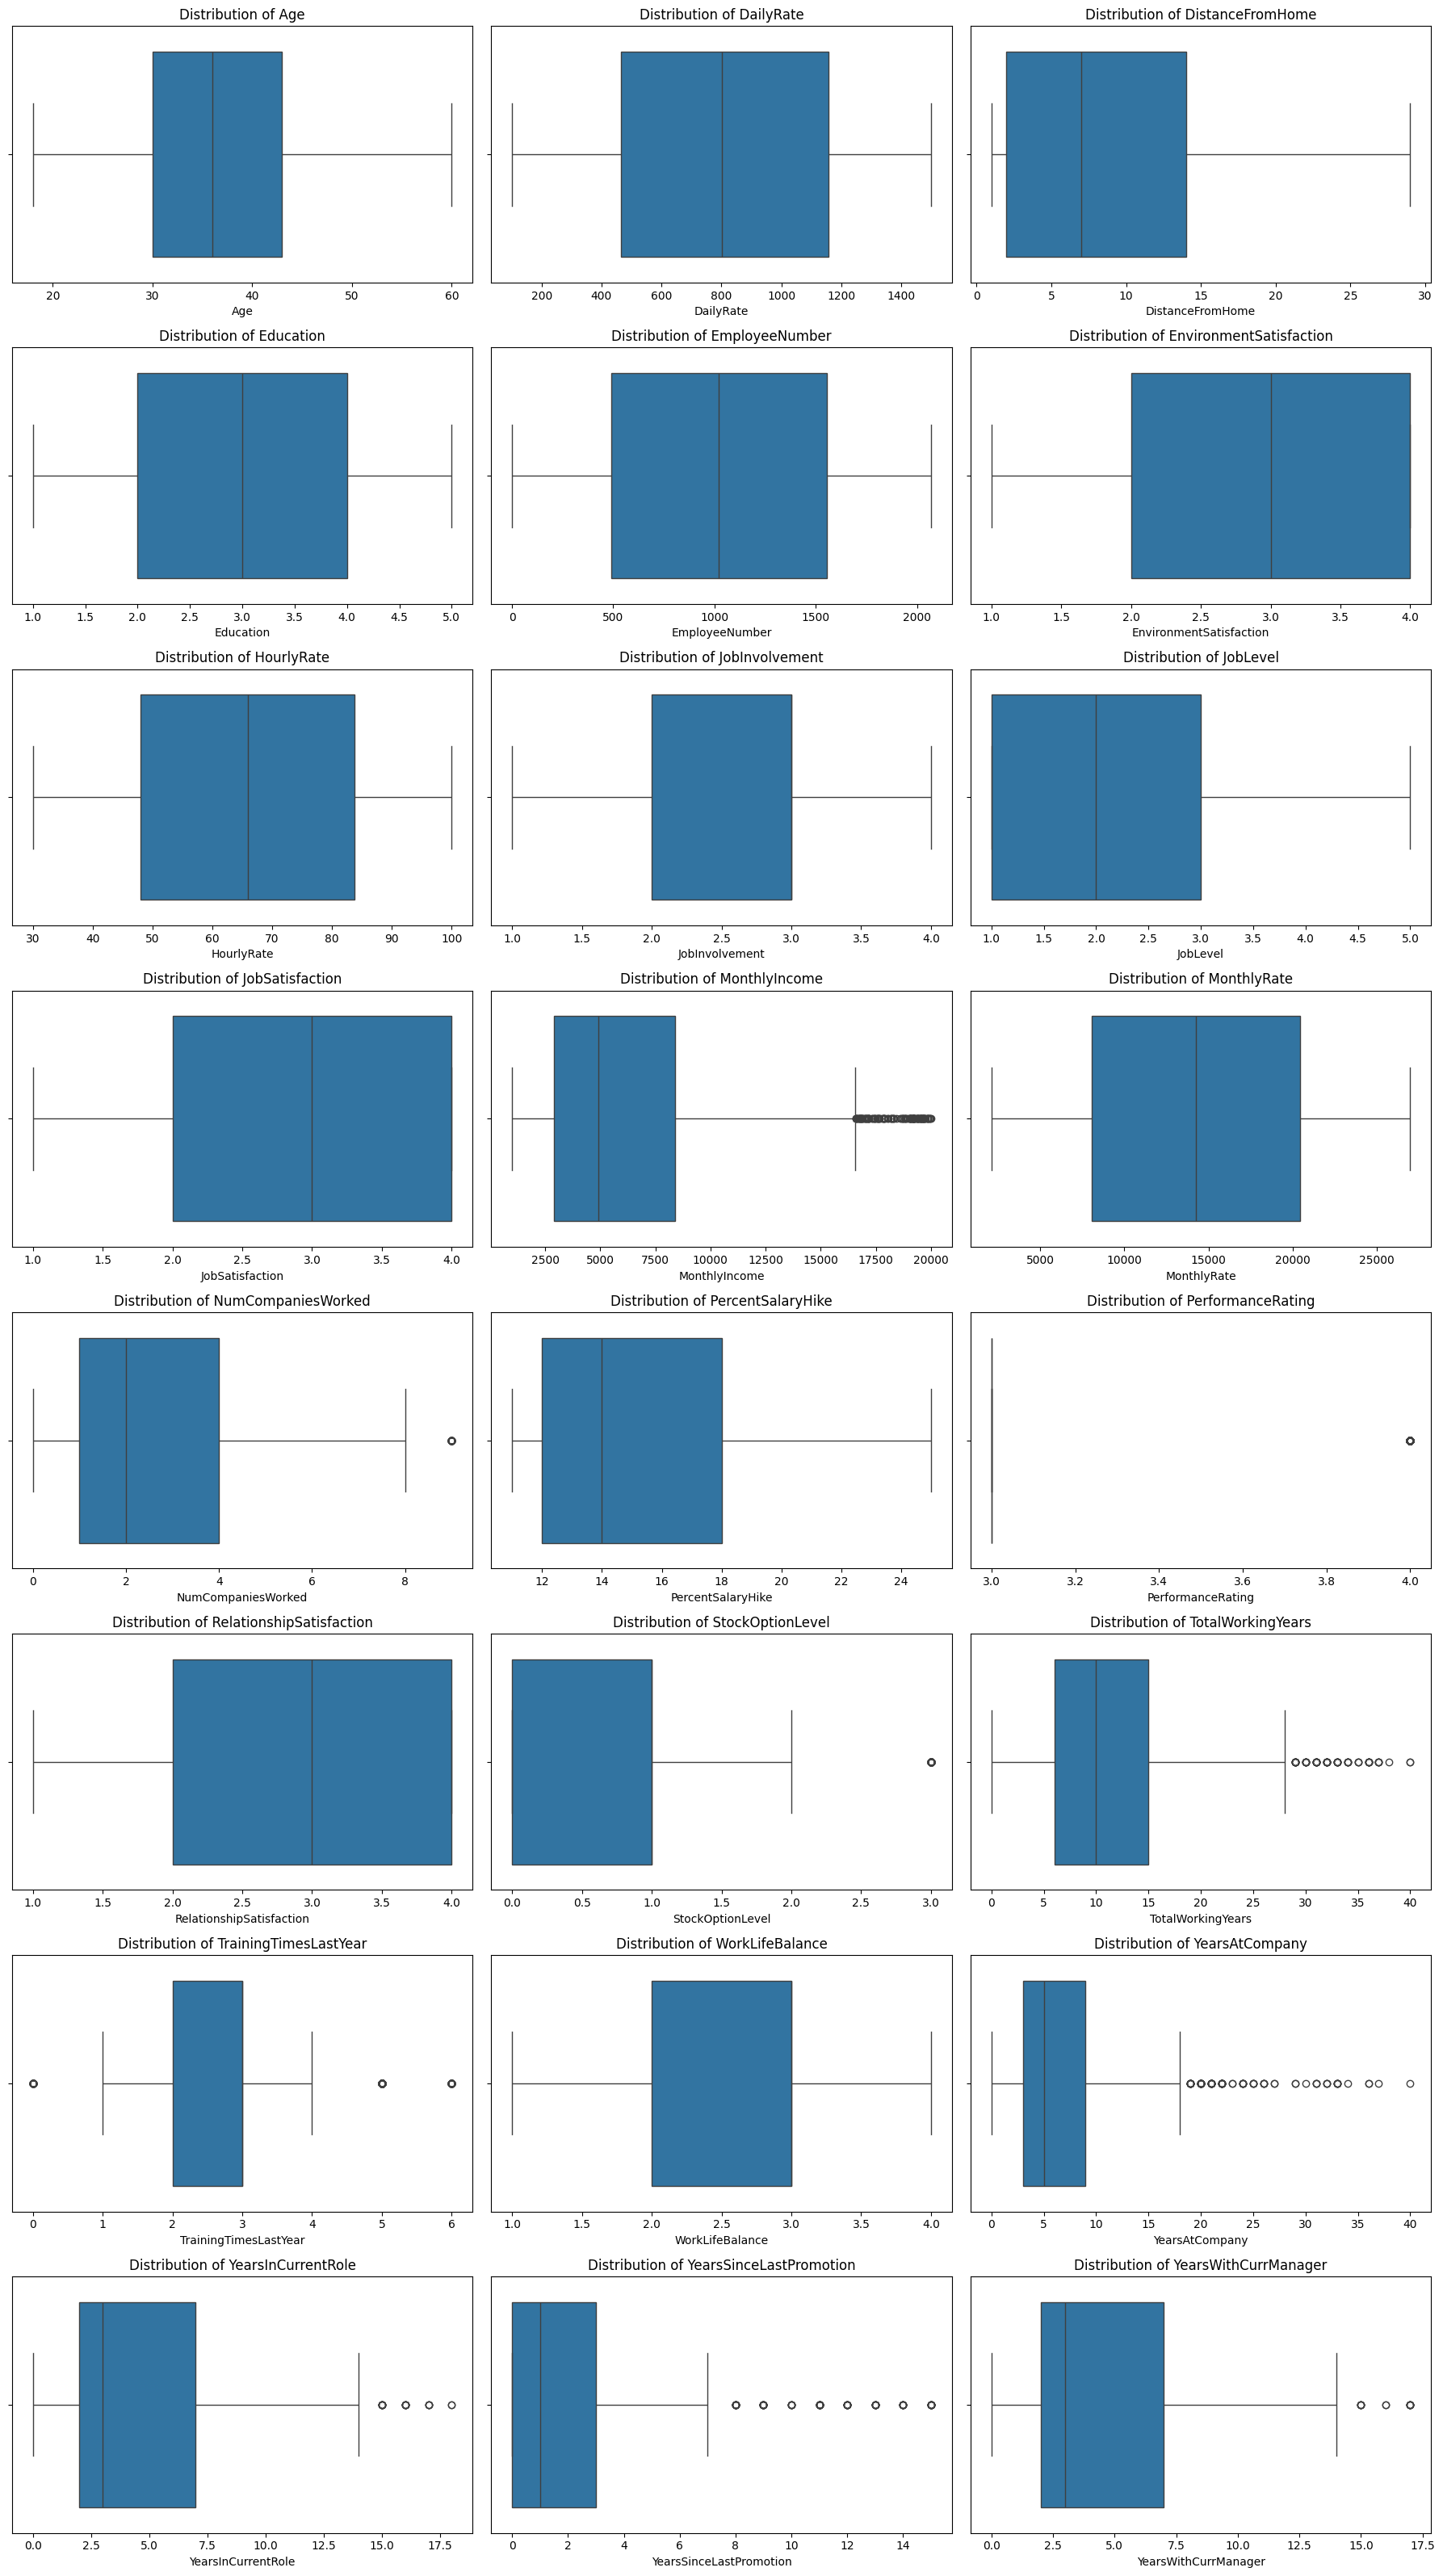

In [95]:
n_cols = 3
n_rows = (len(df_num) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 4 * n_rows))
axes = axes.flatten()

for i, column in enumerate(df_num):
    ax = axes[i]
    sns.boxplot(data=df, x=column, ax=ax)
    ax.set_title(f'Distribution of {column}')

# Hide any unused subplots
for j in range(len(df_num), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

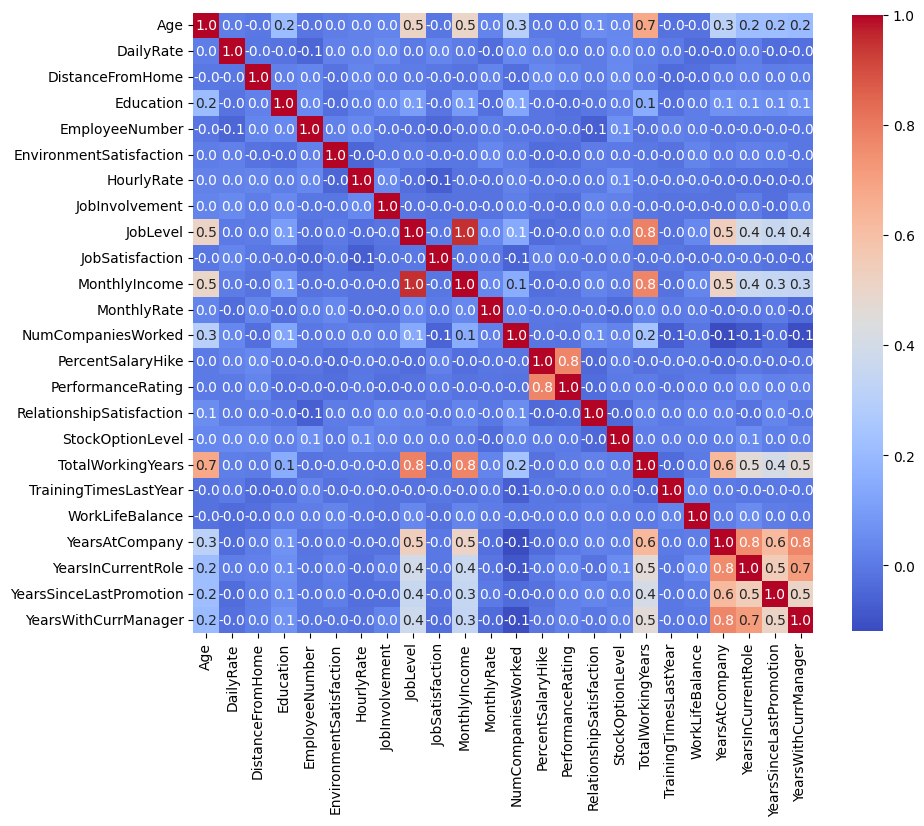

In [96]:
corr_matrix = df[df_num].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
#plt.title(f"Correlation Heatmap for {col_prefix}")
plt.show()

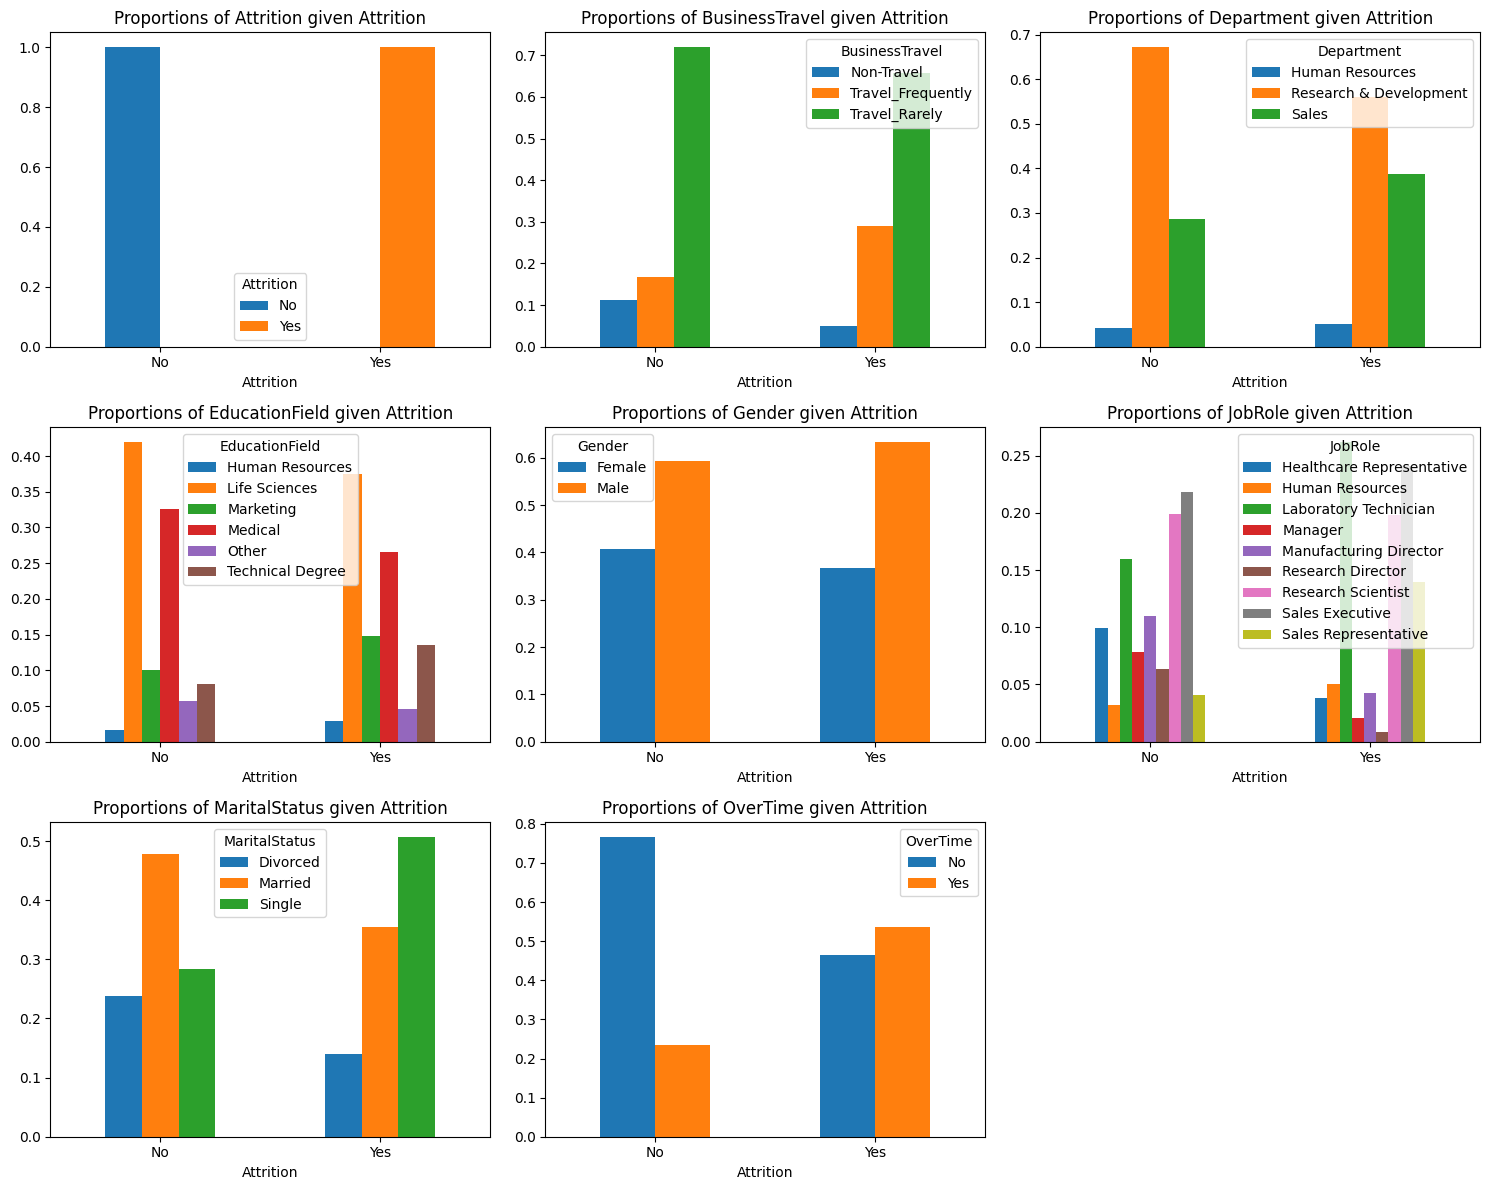

In [99]:
# Plot categories given attrition
plt.figure(figsize=(15, 12))

for i, column in enumerate(df_cat, 1):
    plt.subplot(len(df_cat) // 3 + 1, 3, i)

    prop_table = pd.crosstab(df[column], df['Attrition'], normalize='columns').T

    prop_table.plot(kind='bar', stacked=False, ax=plt.gca())

    plt.title(f'Proportions of {column} given Attrition')

    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()